In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf

yf.pdr_override()

# Date range
start = '2017-01-01'
end = '2019-12-30'

# List of assets
tickers = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = pf.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  23 of 23 completed


/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2f}".format(x) for x in ax.get_yticks()])


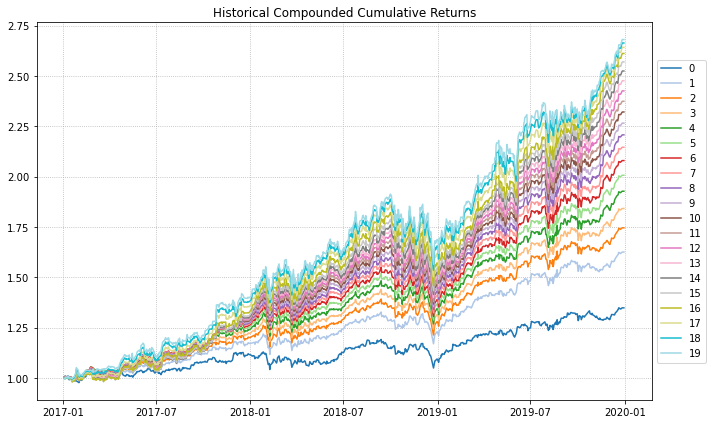

In [2]:
ax = plf.plot_series(returns=Y, w=ws, cmap='tab20', height=6, width=10, ax=None)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.4%}".format(x) for x in ax.get_yticks()])
/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.4%}".format(x) for x in ax.get_xticks()])


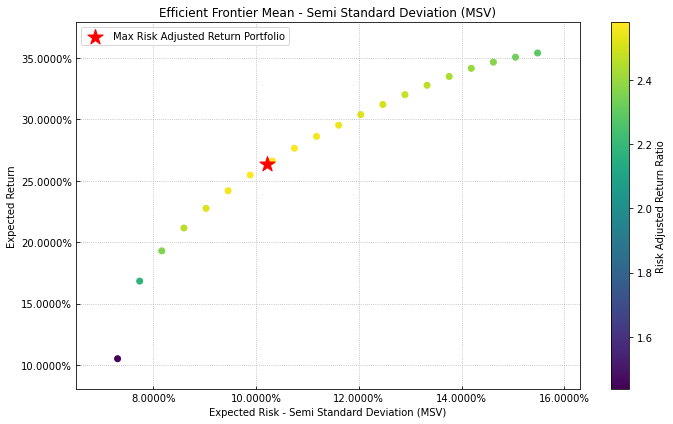

In [3]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = plf.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)

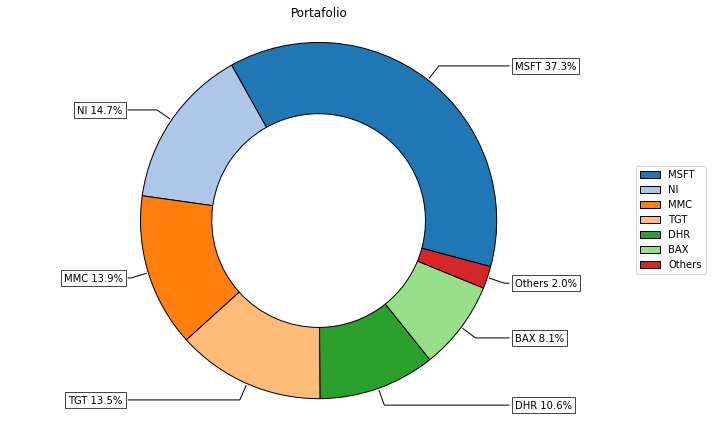

In [4]:
ax = plf.plot_pie(w=w1, title='Portafolio', height=6, width=10,
                  cmap="tab20", ax=None)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:615: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x) for x in ax.get_yticks()])


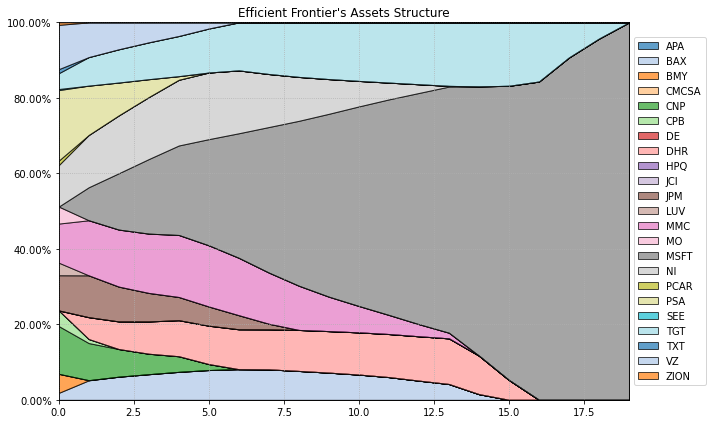

In [5]:
ax = plf.plot_frontier_area(w_frontier=ws, cmap="tab20", height=6,
                            width=10, ax=None)

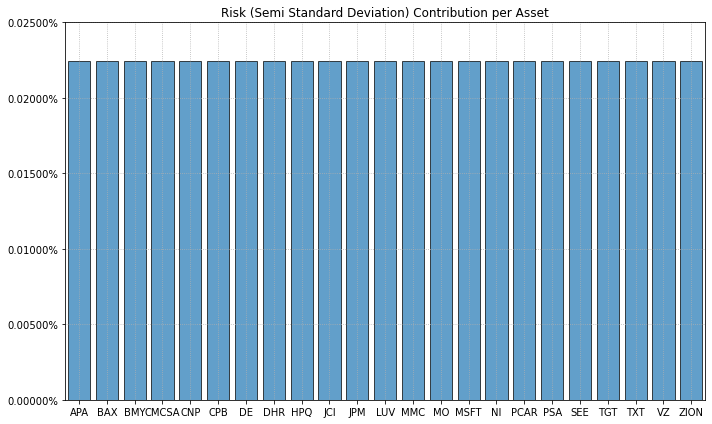

In [7]:
ax = plf.plot_risk_con(w=w2, cov=cov, returns=returns, rm='MSV',
                       rf=0, alpha=0.05, color="tab:blue", height=6,
                       width=10, ax=None)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/RiskFunctions.py:346: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:862: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:3.2%}".format(x) for x in ax.get_xticks()])
/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:863: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x * factor) for x in ax.get_yticks()])


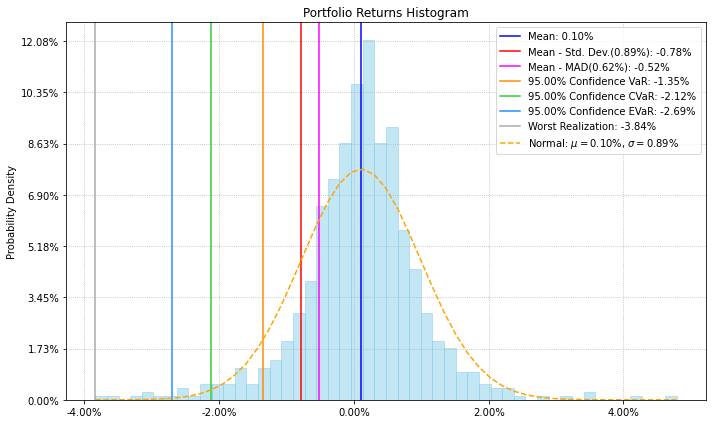

In [8]:
ax = plf.plot_hist(returns=Y, w=w1, alpha=0.05, bins=50, height=6,
                   width=10, ax=None)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:1000: UserWarning: FixedFormatter should only be used together with FixedLocator
  i.set_yticklabels(["{:3.2%}".format(x) for x in i.get_yticks()])
/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/riskfolio/PlotFunctions.py:1000: UserWarning: FixedFormatter should only be used together with FixedLocator
  i.set_yticklabels(["{:3.2%}".format(x) for x in i.get_yticks()])


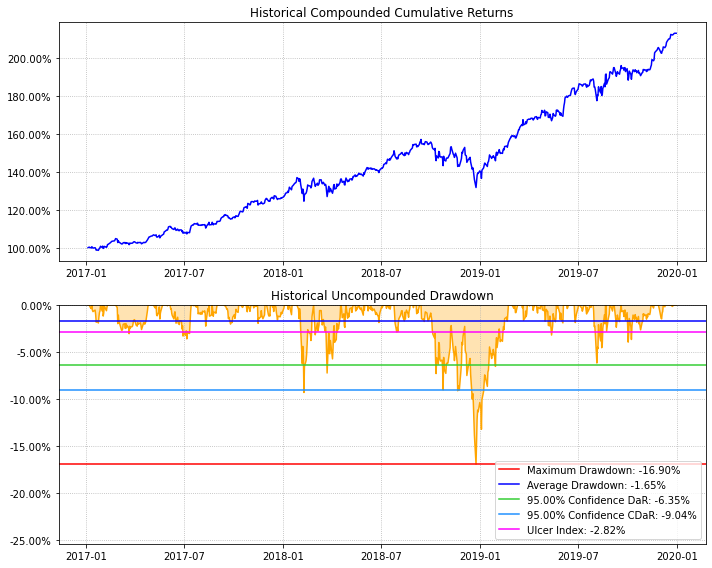

In [9]:
nav=port.nav

ax = plf.plot_drawdown(nav=nav, w=w1, alpha=0.05, height=8, width=10, ax=None)